In [1]:
import os
import pandas as pd
import chardet

# Specify the line from which the data reading begins
START_ROW = 36  # Indexing starts from 0, so the 36th line in the file corresponds to index 35

# Specify the element we're interested in
ELEMENT = 'NH4'

# Specify the heating rates presented in the experimental data and their order
# in degrees/minute
heating_rates = ['5', '3', '10']

# Specify the column names
column_names = ['temperature'] + heating_rates

# Rename columns according to the desired format
new_column_names = ['temperature'] + [f'rate_{rate}' for rate in heating_rates]

# Specify the path to the directory
folder_path = "TGA"

# Get all the files in the specified directory
file_list = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Check if there are files in the list
if not file_list:
    raise Exception("No files found in the specified directory.")
    
# Select the first file from the list that starts with the specified element
tga_file = [file for file in file_list if file.startswith(ELEMENT)]

# Determine the file encoding
with open(os.path.join(folder_path, tga_file[0]), 'rb') as f:
    result = chardet.detect(f.read())
file_encoding = result['encoding']

# Read the data from the CSV file
df = pd.read_csv(
    os.path.join(folder_path, tga_file[0]),
    skiprows=START_ROW,
    names=column_names,
    delimiter=';',
    decimal=',',
    encoding=file_encoding,
    dtype=str  # Read all data as strings
)

# Replace commas with periods and convert to numbers
df = df.apply(lambda x: pd.to_numeric(x.str.replace(',', '.'), errors='coerce'))

# Remove rows with NaN values
df.dropna(inplace=True)

# Rename the columns to the desired format
df.columns = new_column_names

# Output the first five rows of data
df.head()


,temperature,rate_5,rate_3,rate_10
0,31.23291,100.48009,99.46380,99.62310
1,32.18783,100.49841,99.47196,99.63159
2,33.14274,100.49727,99.46862,99.64153
3,34.09766,100.49974,99.46740,99.65072
4,35.05257,100.50067,99.46966,99.66333


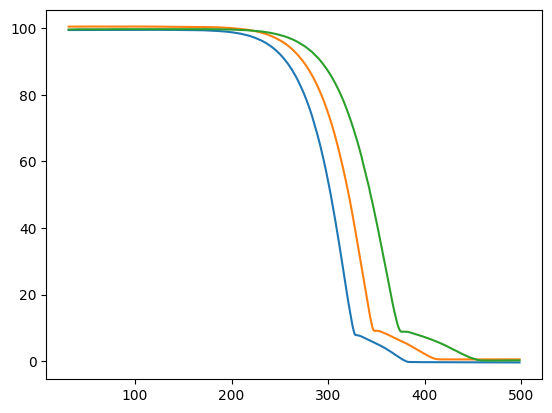

In [2]:
import matplotlib.pyplot as plt

plt.plot(df['temperature'], df['rate_3'])
plt.plot(df['temperature'], df['rate_5'])
plt.plot(df['temperature'], df['rate_10'])

In [ ]:
# Specify the filename for the output CSV file
output_filename = "NH4_parse_TGA.csv"

# Convert DataFrame to CSV
df.to_csv(os.path.join(folder_path, output_filename), index=False)
